<a href="https://colab.research.google.com/github/valenciajaime/MN2022_colabs/blob/main/Nuevos/MN2022_1_BVP_ODE__Clase_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada Presentación Clase

**Nombres:** 

Esteban Velilla H.

Jaime A. Valencia V.


**Email:**

esteban.velilla@udea.edu.co

jalejandro.valencia@udea.edu.co


**Curso:**
Métodos numéricos 2022-1

**Fecha:**
Martes 2022-agosto-09

# Descripción

**Objetivos**

Presentación capitulo 11.3 sobre El metodo de las Diferencias Finitas para la solucion de EDO con condiciones de Frontera (Boundary-value Problem) libro guia Burden y Faires con solucion usando recursos de scipy.integrate.


**Desarrollo**



1.   Metodo de Diferencias Finitas
2.   Descripcion metodo
3.   Resumen metodo
4.   Ejemplo 
5.   Comparacion resultados



# Modulos principales

Importacion de modulo principales de trabajo en Metodos Numericos.

In [ ]:
import pylab as plt
import matplotlib
import numpy as np
import scipy as SC
import sympy as SP

Observacion de las versiones de los modulos importados.

In [ ]:
print("Version numpy: ",np.__version__)
print("Version Matplotlib: ",matplotlib.__version__)
print("Version scipy: ", SC.__version__)
print("Version sympy: ",  SP.__version__)

Version numpy:  1.21.6
Version Matplotlib:  3.2.2
Version scipy:  1.7.3
Version sympy:  1.7.1


# Capitulo 11.3 (Burden&Faires)

## Metodo de las diferencis finitas (caso lineal)

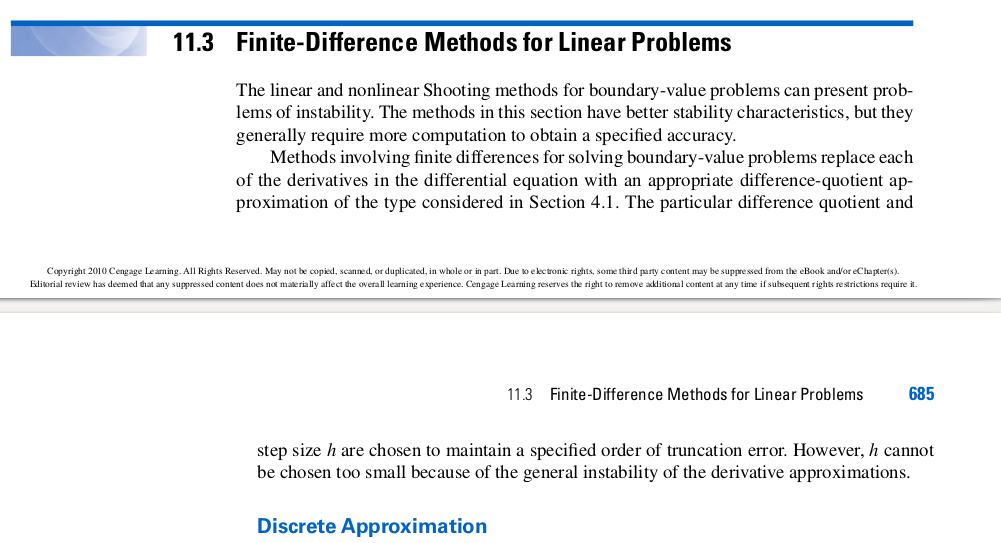

## Ecuacion Diferencial Lineal

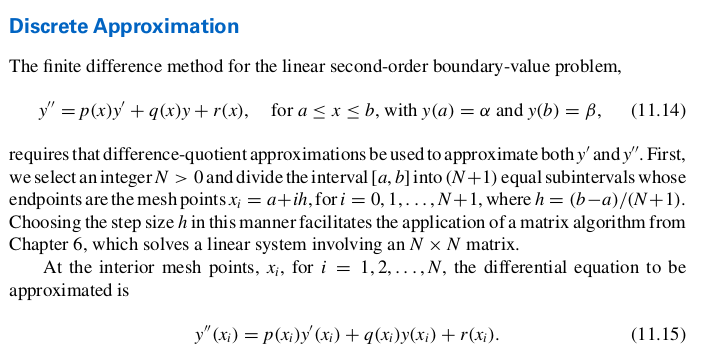

## Descripcion Metodo (FDM)

Aplicar formulas de aproximacion numerica de la derivada.

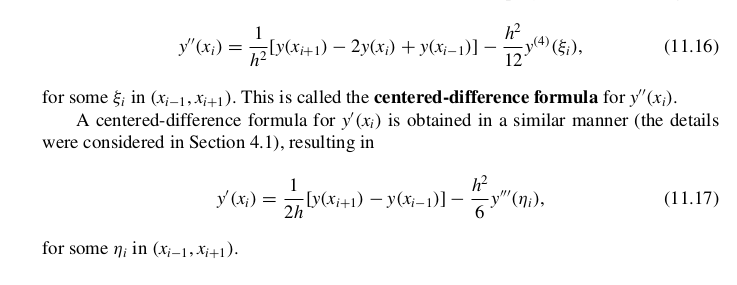

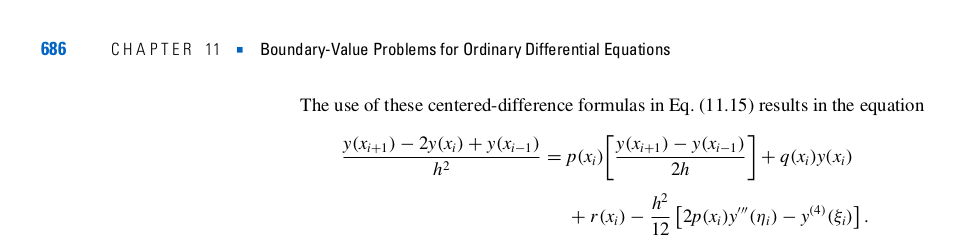

##Resumen del metodo

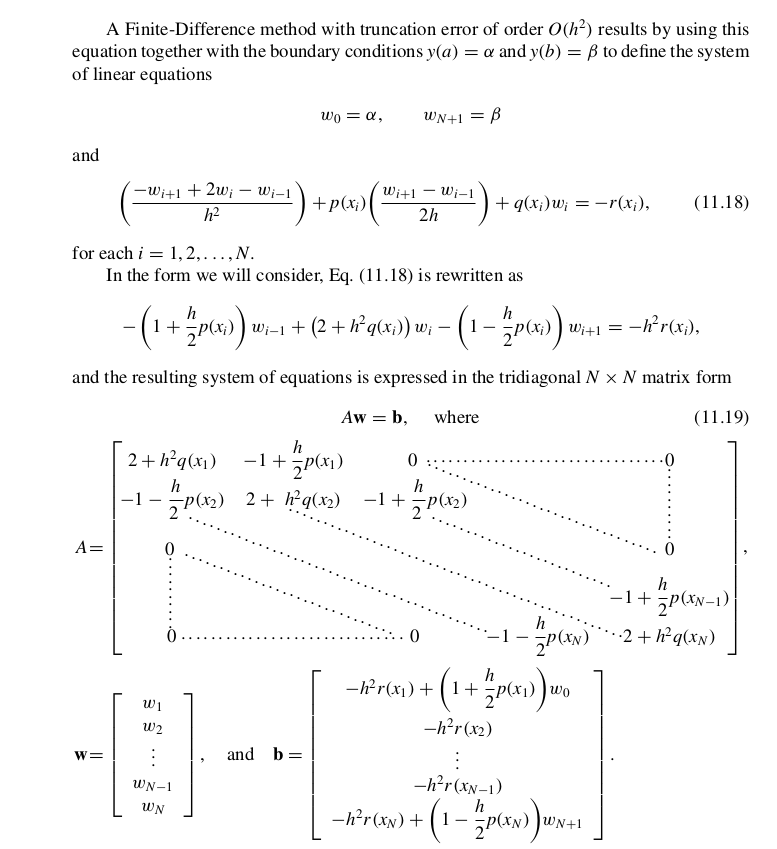

##Ejemplo

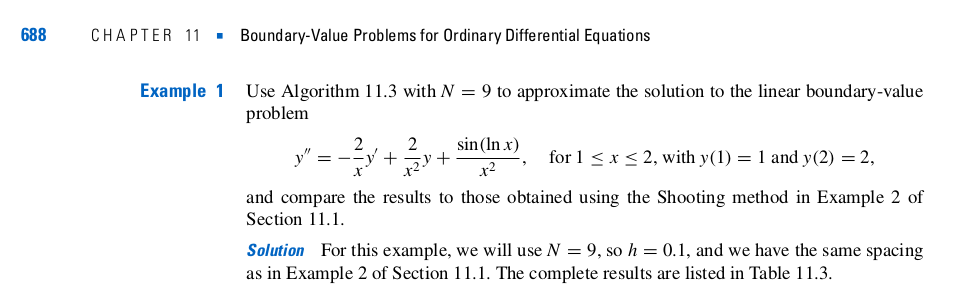

In [ ]:
###Discretizacion Rango x
N = 9
##Coniciones de Fontera
X_a = 1
X_b = 2
Y_a = 1
Y_b = 2

##Rango en x
X = np.linspace(X_a, X_b,N+2)
h = X[1]-X[0] #delta de x

F_p = lambda x: -2/x
F_q = lambda x: 2/(x**2)
F_r = lambda x: np.sin(np.log(x))/(x**2)

## CREACION SISTEMA LINEAL#############################################
##base del algoritmo 11.3 del texto
a = np.zeros(N)
b = np.zeros(N-1)
c = np.zeros(N-1)
d = np.zeros(N) ##vectro independientes

n = 0 
a[n]= 2 + (h**2)*F_q(X[n+1])
b[n]= -1 + (h/2)*F_p(X[n+1])
d[n]= -(h**2)*F_r(X[n+1]) + (1 + (h/2)*F_p(X[n+1]))*Y_a #Flotera en X_a

for n in range(1,N-1):
  a[n]= 2 + (h**2)*F_q(X[n+1])
  b[n]= -1 + (h/2)*F_p(X[n+1])
  c[n-1]= -1 - (h/2)*F_p(X[n+1])
  d[n]= -(h**2)*F_r(X[n+1])

n = 8
a[n]= 2 + (h**2)*F_q(X[n+1])
c[n-1]= -1 - (h/2)*F_p(X[n+1])
d[n]= -(h**2)*F_r(X[n+1]) + (1 - (h/2)*F_p(X[n+1]))*Y_b #Frotera en X_b




In [ ]:
##Creacion de matriz
A = np.diag(a,0)+np.diag(b,1)+np.diag(c,-1)

##Solucion del sistema lineal
y = np.linalg.solve(A,d)

##AGRUPACION RESPUESTA COMPLETA
Y = np.hstack((Y_a,y,Y_b))

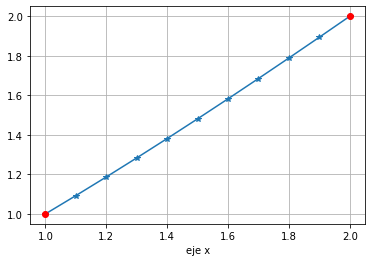

In [ ]:
##Grafico solucion
plt.plot(X,Y,"*-")
plt.plot([X_a,X_b],[Y_a,Y_b],"ro")
plt.grid("on")
plt.xlabel("eje x")
plt.show()

##Comparacion Solucion Exacta

Y:  [1.         1.09260052 1.18704313 1.28333687 1.38140205 1.48112026
 1.5823599  1.68498902 1.78888175 1.8939211  2.        ]


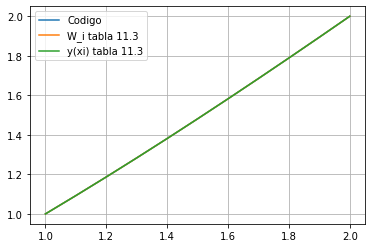

In [ ]:
##Grafico comparativo

#datos libro
W_113=[1.00000000,1.09260052,1.18704313,1.28333687,1.38140205,1.48112026,1.58235990,1.68498902,1.78888175,1.89392110,2.00000000]
Yx_113 = [1.00000000,1.09262930,1.18708484,1.28338236,1.38144595,1.48115942,1.58239246,1.68501396,1.78889853,1.89392951,2.00000000]
print("Y: ",Y)
plt.plot(X,Y,X,W_113,X,Yx_113)
plt.grid("on")
plt.legend(["Codigo","W_i tabla 11.3","y(xi) tabla 11.3"])
plt.show()

# Ejemplo Chapra&Canale

[MN2021-2-Dif_Finitas_bvp](https://colab.research.google.com/drive/1PBBn3C71iW9nrU3N640x0I6EXJMUUfVZ?usp=sharing)


# Resultados y conclusiones

**Conclusiones:**



**Resultados:**

**Referencias:**



*Libros*

[Numerical Computing with MATLAB
Copyright 2004, Cleve Moler. Introd.](https://www.mathworks.com/content/dam/mathworks/mathworks-dot-com/moler/intro.pdf)

[Burde & Faires](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EQd1_32TgMhCh8MBU0FqxpIBSIjxSMEJKAcVIVyvYZHSng?e=nrWw8z)

[Chapra & Canale](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EZgs5MpMDKtLpAZlwGEmn9oB3FvpAGncvlnWPcZ9wRNhIg?e=fPcsyf)





[scipy-integrate 1.8.1](https://docs.scipy.org/doc/scipy/tutorial/integrate.html)

[2017-marzo-15 Prezi](http://numericalmethodsie20152udea.blogspot.com/2017/03/interpolacion-ajuste-y-procesamieto-de.html)

[Guia Burden y Chapra](http://numericalmethodsie20152udea.blogspot.com/2017/03/documentacion-interpolacion-y-ajuste.html)

[2016-sep-14](http://numericalmethodsie20152udea.blogspot.com/2016/09/ajuste-de-funcion-no-lineal.html)

[2016-sep-7](http://numericalmethodsie20152udea.blogspot.com/2016/09/interpolacion-y-ajuste-de-datos.html)